In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving hoax_dataset_with_text.csv to hoax_dataset_with_text.csv


In [ ]:
df = pd.read_csv("hoax_dataset_with_text.csv")

In [ ]:
df.head()

,judul,link,tanggal,deskripsi,teks,label
0,[SALAH] Salam 3 Jari dari Anies Bentuk Dukunga...,https://turnbackhoax.id/2024/10/30/salah-salam...,"Oktober 30, 2024","Faktanya, belum ada dukungan resmi Anies untuk...",Terjadi kesalahan: 502,1
1,[SALAH] Prabowo Ancam Penghujat Pemimpin akan ...,https://turnbackhoax.id/2024/10/30/salah-prabo...,"Oktober 30, 2024",Tidak ada sumber valid yang membenarkan Presid...,Tidak ada sumber valid yang membenarkan Presid...,1
2,[SALAH] Menkes Budi Sebut Lockdown Pandemi Sel...,https://turnbackhoax.id/2024/10/30/salah-menke...,"Oktober 30, 2024",Tidak ada pernyataan Menkes Budi tentang lockd...,Tidak ada pernyataan Menkes Budi tentang lockd...,1
3,[SALAH] Prabowo Bilang “Setujukah Rakyat kalau...,https://turnbackhoax.id/2024/10/30/salah-prabo...,"Oktober 30, 2024",Hasil pencarian di Google mengarah ke pemberit...,Hasil pencarian di Google mengarah ke pemberit...,1
4,[SALAH] Cagub Jakarta Pramono Anung dan Ketua ...,https://turnbackhoax.id/2024/10/30/salah-cagub...,"Oktober 30, 2024",KPK menjelaskan belum ada bukti yang kuat meng...,KPK menjelaskan belum ada bukti yang kuat meng...,1


In [ ]:
print(df.columns)


Index(['judul', 'link', 'tanggal', 'deskripsi', 'teks'], dtype='object')


In [ ]:
def extract_label(judul):
    if judul.startswith("[SALAH]"):
        return "hoax"
    else:
        return "valid"

df['label'] = df['judul'].apply(extract_label)


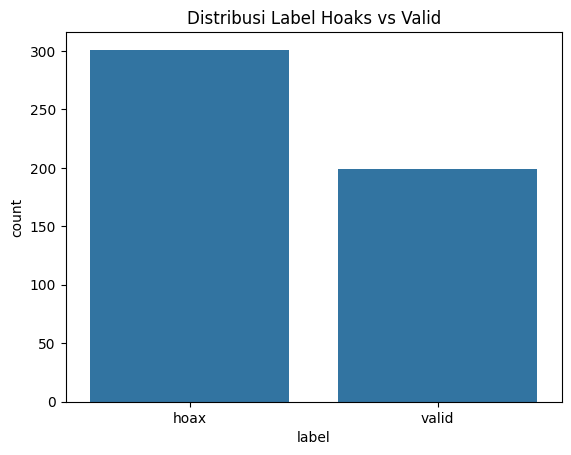

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribusi Label Hoaks vs Valid")
plt.show()


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   judul      500 non-null    object
 1   link       500 non-null    object
 2   tanggal    500 non-null    object
 3   deskripsi  500 non-null    object
 4   teks       500 non-null    object
 5   label      500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [ ]:
print(df.columns)


Index(['judul', 'link', 'tanggal', 'deskripsi', 'teks', 'label'], dtype='object')


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

In [ ]:
df['teks'] = df['teks'].astype(str)

tokenized = tokenizer(
    list(df['teks']),
    padding='max_length',
    truncation=True,
    max_length=128,
    return_tensors='pt'
)


In [ ]:
df['teks'] = df['teks'].astype(str)

In [ ]:
tokenized = tokenizer(
    list(df['teks']),
    padding='max_length',
    truncation=True,
    max_length=128,
    return_tensors='pt'
)

In [ ]:
from sklearn.model_selection import train_test_split
import torch

In [ ]:
df['label'] = df['label'].map({'hoax': 1, 'valid': 0})

In [ ]:
input_ids = tokenized['input_ids']
attention_mask = tokenized['attention_mask']
labels = torch.tensor(df['label'].values)

In [ ]:
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids,
    attention_mask,
    labels,
    test_size=0.2,
    stratify=labels,
    random_state=42
)

In [ ]:
df = df.dropna().drop_duplicates()



In [ ]:
# Menghapus data kosong dan duplikat
df = df.dropna().drop_duplicates()
